### Here we will perfrom a good revision of regression and classification on datasets, and save it.

#### How can we save a machine learning model?
1. with python's `pickle` module.
2. with `jolib` module.


**PICKLE MODULE**
python object - Machine learning model to pickle form.

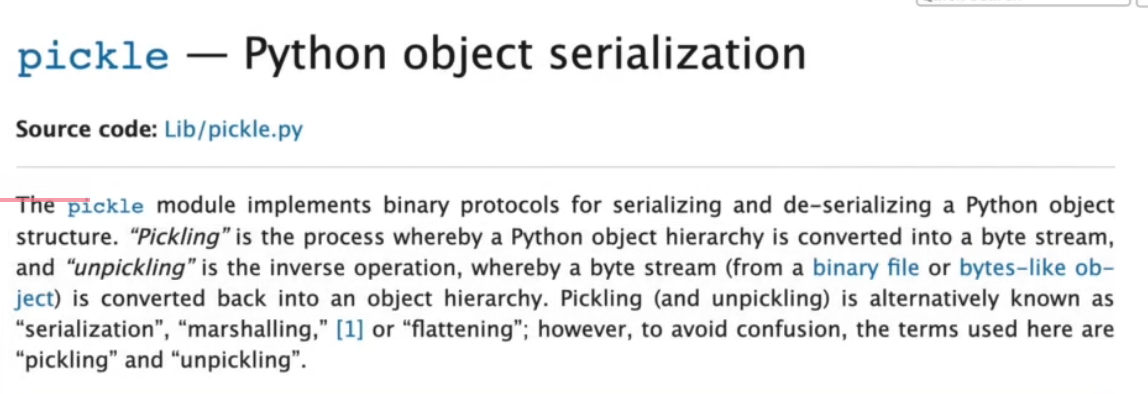

In [1]:
import pickle #to save the module with pickle


# saving the regresion model. 

# we will perform training, evaluating, and then saving the model.


In [2]:
# regresssion starts
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
fr = pd.read_csv("../datasets/Car_sales_missing.csv")
fr

,Manufacturer,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,02-02-2012,58.280150
1,Acura,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,06-03-2011,91.370778
2,Acura,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,01-04-2012,NaN
3,Acura,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,03-10-2011,91.389779
4,Audi,20.397,22.255,Passenger,23.99,1.8,NaN,102.6,68.2,178.0,2.998,16.4,27.0,10-08-2011,62.777639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,3.545,NaN,Passenger,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812
153,Volvo,15.245,NaN,Passenger,27.50,NaN,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495
154,Volvo,17.531,NaN,Passenger,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978
155,Volvo,3.493,NaN,Passenger,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,NaN


In [4]:
fr.isna().sum()

Manufacturer            0
Sales_in_thousands      2
__year_resale_value    40
Vehicle_type            1
Price_in_thousands      7
Engine_size             4
Horsepower              4
Wheelbase               4
Width                   3
Length                  3
Curb_weight             5
Fuel_capacity           2
Fuel_efficiency         3
Latest_Launch           5
Power_perf_factor      13
dtype: int64

In [5]:
fr.describe()

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,155.000000,117.000000,150.000000,153.000000,153.000000,153.000000,154.000000,154.000000,152.000000,155.000000,154.000000,144.000000
mean,52.988665,18.199274,27.472447,3.069935,185.163399,107.542484,71.218831,187.440260,3.376914,17.965806,23.844156,77.105688
std,68.404934,11.599429,14.537089,1.052133,56.458002,7.680355,3.400169,13.357941,0.634877,3.896643,4.282706,25.596383
min,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,65.700000,149.400000,1.895000,10.300000,15.000000,23.276272
25%,13.956000,11.260000,17.953750,2.300000,148.000000,103.000000,68.425000,177.700000,2.964750,15.850000,21.000000,60.567577
50%,29.450000,14.180000,22.747000,3.000000,175.000000,107.000000,70.600000,187.900000,3.341000,17.200000,24.000000,71.186329
75%,67.324000,19.890000,31.956250,3.800000,215.000000,112.200000,73.475000,196.050000,3.788750,19.650000,26.000000,89.408406
max,540.561000,67.550000,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000,188.144323


In [6]:
print(fr.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Sales_in_thousands   155 non-null    float64
 2   __year_resale_value  117 non-null    float64
 3   Vehicle_type         156 non-null    object 
 4   Price_in_thousands   150 non-null    float64
 5   Engine_size          153 non-null    float64
 6   Horsepower           153 non-null    float64
 7   Wheelbase            153 non-null    float64
 8   Width                154 non-null    float64
 9   Length               154 non-null    float64
 10  Curb_weight          152 non-null    float64
 11  Fuel_capacity        155 non-null    float64
 12  Fuel_efficiency      154 non-null    float64
 13  Latest_Launch        152 non-null    object 
 14  Power_perf_factor    144 non-null    float64
dtypes: float64(12), object(3)
memory usage: 

In [7]:
fr["Latest_Launch"],fr["Vehicle_type"],fr["Manufacturer"]

(0      02-02-2012
 1      06-03-2011
 2      01-04-2012
 3      03-10-2011
 4      10-08-2011
           ...    
 152     9/21/2011
 153    11/24/2012
 154     6/25/2011
 155     4/26/2011
 156    11/14/2011
 Name: Latest_Launch, Length: 157, dtype: object,
 0      Passenger
 1      Passenger
 2      Passenger
 3      Passenger
 4      Passenger
          ...    
 152    Passenger
 153    Passenger
 154    Passenger
 155    Passenger
 156    Passenger
 Name: Vehicle_type, Length: 157, dtype: object,
 0      Acura
 1      Acura
 2      Acura
 3      Acura
 4       Audi
        ...  
 152    Volvo
 153    Volvo
 154    Volvo
 155    Volvo
 156    Volvo
 Name: Manufacturer, Length: 157, dtype: object)

we know that before converting the string to numbers, fill the missing values.

In [8]:
fr["Vehicle_type"].fillna("missing", inplace=True) # if we have string 
fr["__year_resale_value"].fillna(fr["__year_resale_value"].mean(),inplace=True)
fr["Sales_in_thousands"].fillna(fr["Sales_in_thousands"].mean(),inplace=True)
fr["Price_in_thousands"].fillna(fr["Price_in_thousands"].mean(),inplace=True)
fr["Engine_size"].fillna(fr["Engine_size"].mean(),inplace=True)
fr["Horsepower"].fillna(fr["Horsepower"].mean(),inplace=True)
fr["Wheelbase"].fillna(fr["Wheelbase"].mean(),inplace=True)
fr["Width"].fillna(fr["Width"].mean(),inplace=True)
fr["Length"].fillna(fr["Length"].mean(),inplace=True)
fr["Curb_weight"].fillna(fr["Curb_weight"].mean(),inplace=True)
fr["Curb_weight"].fillna(fr["Curb_weight"].mean(),inplace=True)
fr["Fuel_capacity"].fillna(fr["Fuel_capacity"].mean(),inplace=True)
fr["Fuel_efficiency"].fillna(fr["Fuel_efficiency"].mean(),inplace=True)
fr["Power_perf_factor"].fillna(fr["Power_perf_factor"].mean(),inplace=True)
fr.isna().sum()

Manufacturer           0
Sales_in_thousands     0
__year_resale_value    0
Vehicle_type           0
Price_in_thousands     0
Engine_size            0
Horsepower             0
Wheelbase              0
Width                  0
Length                 0
Curb_weight            0
Fuel_capacity          0
Fuel_efficiency        0
Latest_Launch          5
Power_perf_factor      0
dtype: int64

In [9]:
fr.head(25)

,Manufacturer,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,16.919,16.360000,Passenger,21.500000,1.8,140.000000,101.2,67.3,172.4,2.639000,13.2,28.0,02-02-2012,58.280150
1,Acura,39.384,19.875000,Passenger,28.400000,3.2,225.000000,108.1,70.3,192.9,3.517000,17.2,25.0,06-03-2011,91.370778
2,Acura,14.114,18.225000,Passenger,27.472447,3.2,225.000000,106.9,70.6,192.0,3.470000,17.2,26.0,01-04-2012,77.105688
3,Acura,8.588,29.725000,Passenger,42.000000,3.5,210.000000,114.6,71.4,196.6,3.850000,18.0,22.0,03-10-2011,91.389779
4,Audi,20.397,22.255000,Passenger,23.990000,1.8,185.163399,102.6,68.2,178.0,2.998000,16.4,27.0,10-08-2011,62.777639
5,Audi,18.780,23.555000,Passenger,33.950000,2.8,200.000000,108.7,76.1,192.0,3.561000,18.5,22.0,08-09-2011,84.565105
6,Audi,1.380,39.000000,Passenger,62.000000,4.2,310.000000,113.0,74.0,198.2,3.902000,23.7,21.0,2/27/2012,134.656858
7,BMW,19.747,18.199274,Passenger,26.990000,2.5,170.000000,107.3,68.4,176.0,3.179000,16.6,26.0,6/28/2011,71.191207
8,BMW,9.231,28.675000,Passenger,33.400000,2.8,193.000000,107.3,68.5,176.0,3.197000,16.6,24.0,1/29/2012,81.877069
9,BMW,17.527,36.125000,Passenger,38.900000,2.8,193.000000,111.4,70.9,188.0,3.472000,18.5,25.0,04-04-2011,83.998724


In [10]:
fr.drop("Latest_Launch",axis=1,inplace=True)

In [11]:
fr.head(25)

,Manufacturer,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
0,Acura,16.919,16.360000,Passenger,21.500000,1.8,140.000000,101.2,67.3,172.4,2.639000,13.2,28.0,58.280150
1,Acura,39.384,19.875000,Passenger,28.400000,3.2,225.000000,108.1,70.3,192.9,3.517000,17.2,25.0,91.370778
2,Acura,14.114,18.225000,Passenger,27.472447,3.2,225.000000,106.9,70.6,192.0,3.470000,17.2,26.0,77.105688
3,Acura,8.588,29.725000,Passenger,42.000000,3.5,210.000000,114.6,71.4,196.6,3.850000,18.0,22.0,91.389779
4,Audi,20.397,22.255000,Passenger,23.990000,1.8,185.163399,102.6,68.2,178.0,2.998000,16.4,27.0,62.777639
5,Audi,18.780,23.555000,Passenger,33.950000,2.8,200.000000,108.7,76.1,192.0,3.561000,18.5,22.0,84.565105
6,Audi,1.380,39.000000,Passenger,62.000000,4.2,310.000000,113.0,74.0,198.2,3.902000,23.7,21.0,134.656858
7,BMW,19.747,18.199274,Passenger,26.990000,2.5,170.000000,107.3,68.4,176.0,3.179000,16.6,26.0,71.191207
8,BMW,9.231,28.675000,Passenger,33.400000,2.8,193.000000,107.3,68.5,176.0,3.197000,16.6,24.0,81.877069
9,BMW,17.527,36.125000,Passenger,38.900000,2.8,193.000000,111.4,70.9,188.0,3.472000,18.5,25.0,83.998724


In [12]:
print(fr.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Sales_in_thousands   157 non-null    float64
 2   __year_resale_value  157 non-null    float64
 3   Vehicle_type         157 non-null    object 
 4   Price_in_thousands   157 non-null    float64
 5   Engine_size          157 non-null    float64
 6   Horsepower           157 non-null    float64
 7   Wheelbase            157 non-null    float64
 8   Width                157 non-null    float64
 9   Length               157 non-null    float64
 10  Curb_weight          157 non-null    float64
 11  Fuel_capacity        157 non-null    float64
 12  Fuel_efficiency      157 non-null    float64
 13  Power_perf_factor    157 non-null    float64
dtypes: float64(12), object(2)
memory usage: 17.3+ KB
None


In [13]:
fr.isna().sum()

Manufacturer           0
Sales_in_thousands     0
__year_resale_value    0
Vehicle_type           0
Price_in_thousands     0
Engine_size            0
Horsepower             0
Wheelbase              0
Width                  0
Length                 0
Curb_weight            0
Fuel_capacity          0
Fuel_efficiency        0
Power_perf_factor      0
dtype: int64

now that we don't have any missing values in the dataset lets convert it to numbers using onehotencoder.

In [14]:
fr = pd.DataFrame(fr)
print(fr.columns)

Index(['Manufacturer', 'Sales_in_thousands', '__year_resale_value',
       'Vehicle_type', 'Price_in_thousands', 'Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency', 'Power_perf_factor'],
      dtype='object')


In [15]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd

# Assuming 'fr' is your DataFrame containing the columns 'Manufacturer' and 'Vehicle_type'

categorical_features = ["Manufacturer", "Vehicle_type"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)],
                                remainder="passthrough")

# Ensure fr is a DataFrame
fr = pd.DataFrame(fr)  # Assuming 'fr' is your DataFrame

# Perform transformation
fr = transformer.fit_transform(fr)

# Convert the transformed_data back to a DataFrame if needed
fr = pd.DataFrame(fr)
fr


,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,21.500000,1.800000,140.000000,101.2,67.3,172.4,2.639,13.2,28.0,58.280150
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,28.400000,3.200000,225.000000,108.1,70.3,192.9,3.517,17.2,25.0,91.370778
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,27.472447,3.200000,225.000000,106.9,70.6,192.0,3.470,17.2,26.0,77.105688
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,42.000000,3.500000,210.000000,114.6,71.4,196.6,3.850,18.0,22.0,91.389779
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,23.990000,1.800000,185.163399,102.6,68.2,178.0,2.998,16.4,27.0,62.777639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,24.400000,1.900000,160.000000,100.5,67.6,176.6,3.042,15.8,25.0,66.498812
153,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,27.500000,3.069935,168.000000,104.9,69.3,185.9,3.208,17.9,25.0,70.654495
154,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,28.800000,2.400000,168.000000,104.9,69.3,186.2,3.259,17.9,25.0,71.155978
155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,45.500000,2.300000,236.000000,104.9,71.5,185.7,3.601,18.5,23.0,77.105688


In [16]:
fr.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
dtype: int64

In [17]:
print(fr.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 45 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       157 non-null    float64
 1   1       157 non-null    float64
 2   2       157 non-null    float64
 3   3       157 non-null    float64
 4   4       157 non-null    float64
 5   5       157 non-null    float64
 6   6       157 non-null    float64
 7   7       157 non-null    float64
 8   8       157 non-null    float64
 9   9       157 non-null    float64
 10  10      157 non-null    float64
 11  11      157 non-null    float64
 12  12      157 non-null    float64
 13  13      157 non-null    float64
 14  14      157 non-null    float64
 15  15      157 non-null    float64
 16  16      157 non-null    float64
 17  17      157 non-null    float64
 18  18      157 non-null    float64
 19  19      157 non-null    float64
 20  20      157 non-null    float64
 21  21      157 non-null    float64
 22  22

In [18]:
# applying the model.

from sklearn.linear_model import LinearRegression
model_regression = LinearRegression()

# vertical split

np.random.seed(50)
x = fr.drop(35,axis=1)
y = fr[35]

# horizontal
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=50)

model_regression.fit(x_train,y_train)

LinearRegression()

In [19]:
model_regression.score(x_test,y_test)

0.8521282258248588

In [20]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
y_preds_fr = model_regression.predict(x_test)

r2_score(y_test,y_preds_fr),mean_absolute_error(y_test,y_preds_fr),mean_squared_error(y_test,y_preds_fr)

(0.8521282258248588, 3.4041849008960234, 26.306755531274156)

In [21]:
# cross validation score
from sklearn.model_selection import cross_val_score
cross_val_score(model_regression,x,y,cv=5,scoring=None)

array([-1.42526132e+21,  5.64510386e-01,  8.32910080e-01,  7.88162188e-01,
        7.72824081e-01])

In [24]:
# save the model for regression 
import pickle

pickle.dump(model_regression,open("Linear_Regression_model.pkl","wb")) #save the model

In [25]:
# loading back the model

fr_loaded = pickle.load(open("Linear_Regression_model.pkl","rb"))

# USe the model as it is.
fr_loaded.score(x_test,y_test)

0.8521282258248588

#  Saving the model using joblib


In [26]:
from joblib import dump, load
dump(model_regression,filename="Linear_Regression_model_joblibed.joblib")

['Linear_Regression_model_joblibed.joblib']

In [27]:
fr_loaded = load(filename="Linear_Regression_model_joblibed.joblib")
fr_loaded.score(x_test,y_test) #used again!! 

0.8521282258248588

In [28]:
y_preds_fr_ = fr_loaded.predict(x_test)
r2_score(y_test,y_preds_fr_),mean_absolute_error(y_test,y_preds_fr_),mean_squared_error(y_test,y_preds_fr_)

(0.8521282258248588, 3.4041849008960234, 26.306755531274156)

In [29]:
from sklearn.model_selection import cross_val_score
cross_val_score(fr_loaded,x,y,cv=5,scoring=None)

array([-1.42526132e+21,  5.64510386e-01,  8.32910080e-01,  7.88162188e-01,
        7.72824081e-01])

## Which method to use?

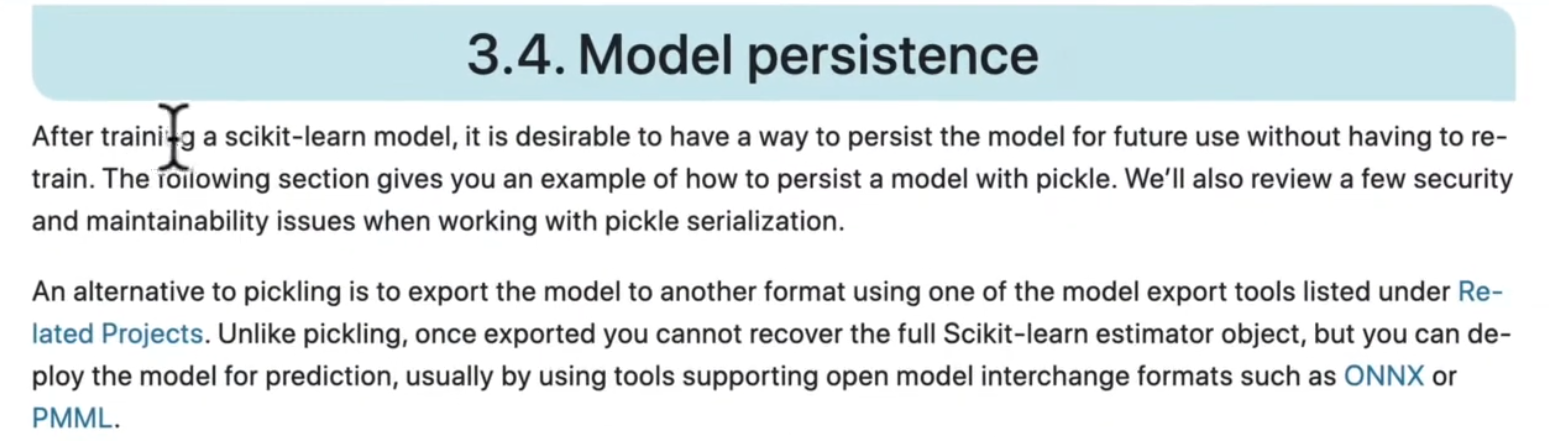 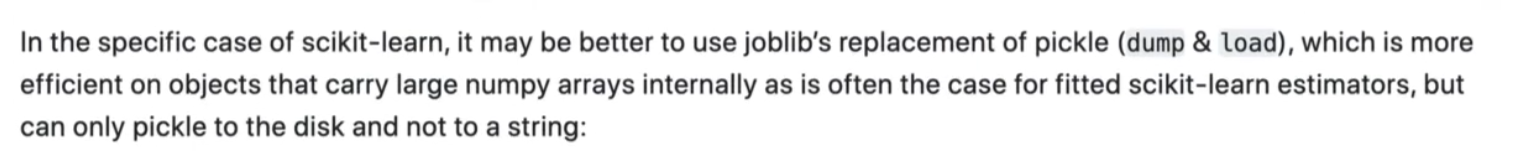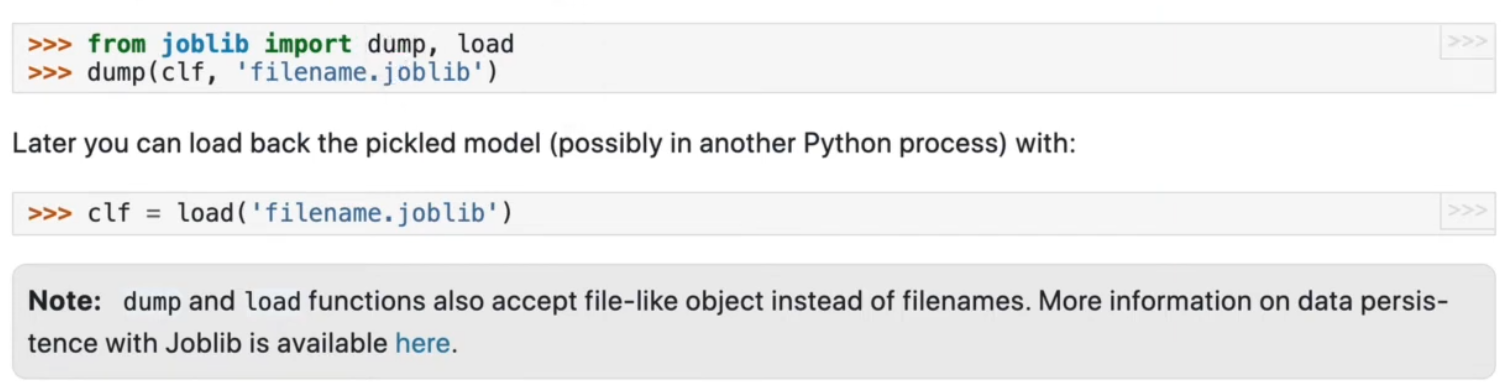